# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [19]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [21]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [22]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [23]:
# Extract all rows of data
mars_weather =  soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in mars_weather:
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    weather_data.append(row_data)

In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(weather_data[1:], columns=weather_data[0])
#Set the index to the 'id' column
mars_df = mars_df.set_index('id')
# Confirm DataFrame was created successfully
mars_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [26]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   terrestrial_date  1867 non-null   object
 1   sol               1867 non-null   object
 2   ls                1867 non-null   object
 3   month             1867 non-null   object
 4   min_temp          1867 non-null   object
 5   pressure          1867 non-null   object
dtypes: object(6)
memory usage: 102.1+ KB


In [27]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('int')
mars_df['ls'] = mars_df['ls'].astype('int')
mars_df['month'] = mars_df['month'].astype('int')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float')

In [28]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
total_months = mars_df['month'].nunique()
total_months
print(f"There are {total_months} months on Mars.")

There are 12 months on Mars.


In [30]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_df['sol'].nunique()
print(f"There are {total_sols} sols of data.")

There are 1867 sols of data.


In [31]:
# 3. What is the average minimum temperature by month?
monthly_temperature = mars_df.groupby('month')['min_temp'].mean()


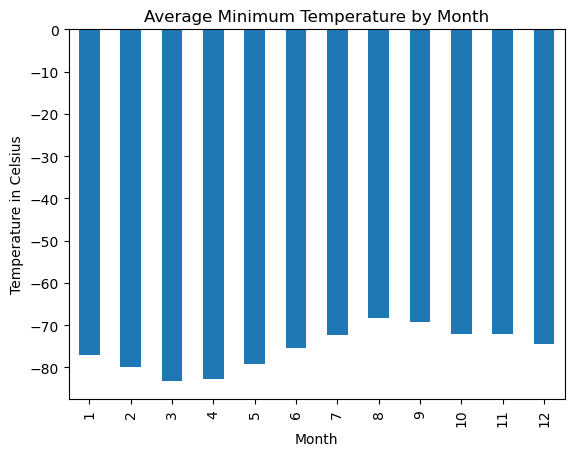

In [32]:
# Plot the average minimum temperature by month
monthly_temperature.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()


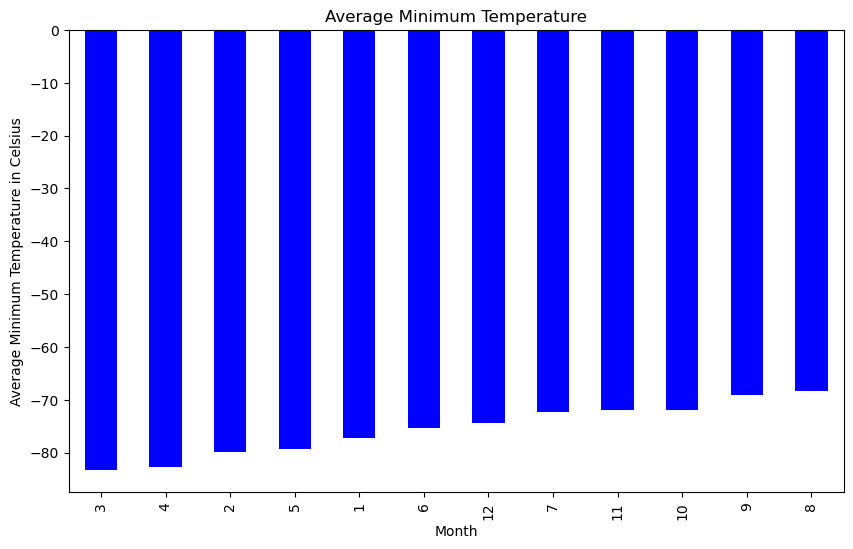

In [33]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
monthly_temperature_sorted = monthly_temperature.sort_values(ascending=True)
monthly_temperature_sorted.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Average Minimum Temperature')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature in Celsius')
plt.show()

In [34]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

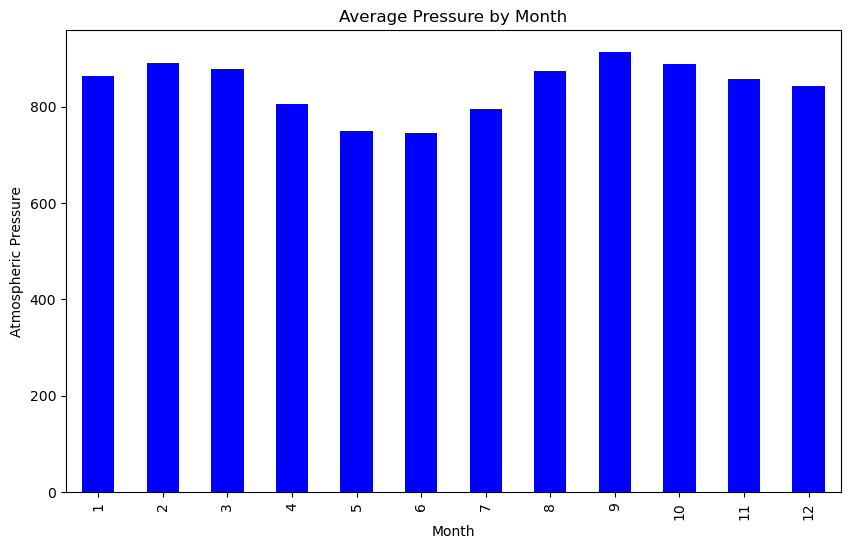

In [35]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()


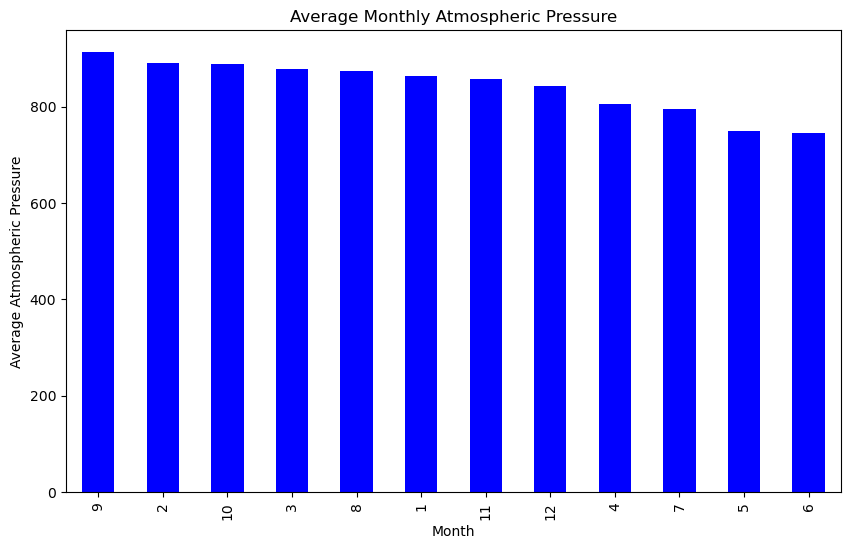

In [36]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
monthly_pressure_sorted = avg_pressure.sort_values(ascending=False)
monthly_pressure_sorted.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Monthly Atmospheric Pressure')
plt.show()

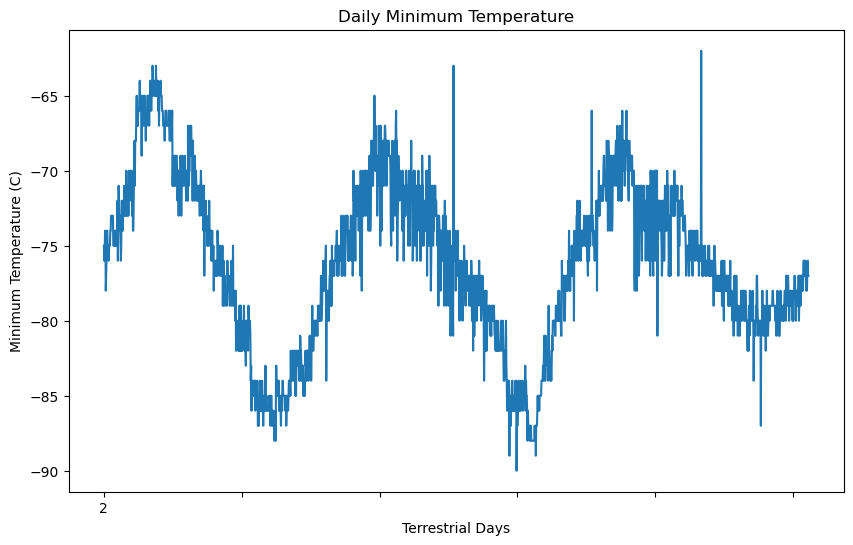

In [37]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df['min_temp'].plot(kind='line', figsize=(10, 6))
plt.xticks([0, 365, 730, 1095, 1460, 1825])  
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (C)')
plt.title('Daily Minimum Temperature')
plt.show()

#### Minimum Temperature
Based on the analysis on minimum temperature, the colder months consisted of Febuary, March, and April and the the warmer months consisted of July, August, September. Throughout the entire year, the temperature remains well below 0 Celsius. 

#### Atmospheric Pressure

On Mars, September has the highest atmospheric pressure, while June has the lowest atmospheric pressure, indicating a potential unknown factor that influences the sudden drop in the May-June period. 

#### Year Length

The year length on Mars appears to be a little more than 600 days on Earth, based roughly on the minumium temperatures.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index=False)

In [39]:
browser.quit()